# Capstone Two - Pre-processing and Training Data Development

# About Pathrise

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. The first 2 weeks in the program are called a free trial period and a fellow can withdraw within this free trial period without any penalty. After 2 weeks, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. The entire program lasts up to a year, including 8 weeks of the core curriculum. If a fellow is unable to find a job within a year after joining Pathrise, his/her contract is terminated. However, there might be some exceptions. For instance, if someone was on a break, we may extend their contract for the period of the break. 

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business.
 

# Analysis Goal

The main goal of this analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

# Data wrangling

I will start by importing the data I collected from Pathrise. I will organizing the data, and making sure it's well defined before exploring the data.

In [108]:
#import data wrangling Libraries
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.dummy import DummyRegressor

from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [109]:
#loading the data from Pathrise company. I assigned it to df as in data frame using pandas
df=pd.read_csv("Data_Pathrise.csv")

In [110]:
#I want to see what is in the first 10 rows.
df.head(10)

,id,company_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
7,8,Withdrawn (Failed),SWE,AUG19A,19.0,0,Employed Part-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Citizen,4.0,15,Female,Latino or Hispanic American
8,9,Active,SWE,AUG19B,NaN,0,Student,Master's Degree,Less than one month,Technical interviewing,1-2 years,F1 Visa/CPT,1.0,5,Male,East Asian or Asian American
9,10,Withdrawn (Trial),SWE,SEP19A,13.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,Citizen,0.0,10,Male,"Black, Afro-Caribbean, or African American"


there seems to be some NANs in the dataset. I want more insight, so i will use the describe() function

In [111]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [112]:
#i want to know how many columns and rows i am dealing with. so i will call the .shape function
df.shape

(2544, 16)

In [113]:
#i want to explore the data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   company_status               2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

I see that the "placed" column is int64. I will need this column and program_duration_days in the future to predict which fellow will be placed or not. This is not final as I need to explore the data more to actually figure out what to do in my regression analysis. 

# Exploratory Data Analysis

In [114]:
#I want to filter my column of interest "placed" to have a better look using the transpose function
df.placed.T

0       0
1       0
2       0
3       0
4       1
       ..
2539    0
2540    0
2541    0
2542    0
2543    0
Name: placed, Length: 2544, dtype: int64

From this information, it seems like placed with 1 might mean the fellow was placed while 0 means the fellow wasn't or droped out. I wonder if there are more insight on this and how is the rest of columns. I need to count the number of missing values for all the columns. 

In [115]:
#count the number of missing values
miss_value = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
miss_value.columns=['count', '%']
miss_value.sort_values(by=['%'],ascending=False)

,count,%
program_duration_days,616,24.213836
gender,492,19.339623
work_authorization_status,284,11.163522
employment_status,229,9.001572
professional_experience,222,8.726415
number_of_interviews,218,8.569182
length_of_job_search,74,2.908805
highest_level_of_education,58,2.279874
biggest_challenge_in_search,24,0.943396
race,18,0.707547


24.21% of program_duration_day is missing. It would make sense to drop columns with missing values but the nature of the problem Pathrise is experience demands a thorough insight. Hence I will keep the column and since it is the column with the highest missing values, I will try and work with the rest for now except gender. I do not think gender will have any effect on whether a fellow is placed or not. 

In [116]:
#Dropping the gender column
df=df.drop(['gender'], axis=1)
df=df.drop(['id'], axis=1) #droping the id since it's pretty much row numbering

In [117]:
#I will drop rows with missing least values
df.dropna(subset = ['biggest_challenge_in_search','cohort_tag', 'race'], inplace = True)

In [118]:
# Exploring Categorical Features of the dataset

I want to make sure that there are no duplicates, that each column is unique. 

In [119]:
df_object = df.select_dtypes('object')

In [120]:
df_object.columns.value_counts()

cohort_tag                     1
company_status                 1
length_of_job_search           1
work_authorization_status      1
highest_level_of_education     1
biggest_challenge_in_search    1
primary_track                  1
employment_status              1
professional_experience        1
race                           1
dtype: int64

There are no duplicates.

Let's get some insight on each of the numerical feautures and see how they correlate to one another using .corr() function

In [121]:
df.corr()

,program_duration_days,placed,number_of_interviews,number_of_applications
program_duration_days,1.000000,0.196716,-0.065421,-0.061295
placed,0.196716,1.000000,-0.008074,-0.028331
number_of_interviews,-0.065421,-0.008074,1.000000,0.069849
number_of_applications,-0.061295,-0.028331,0.069849,1.000000


INSIGHTS:
placed and program_duration_days have a positive correlation followed by number_of_application and placed with -0.028331. Looking at the correlation table, it seems like the fellows that turned in less number of applications were most likely going to be placed compare to fellows that have been in the program for a long time. I will show this using a scatterplot to display the three variables at once 

<AxesSubplot:xlabel='number_of_applications', ylabel='program_duration_days'>

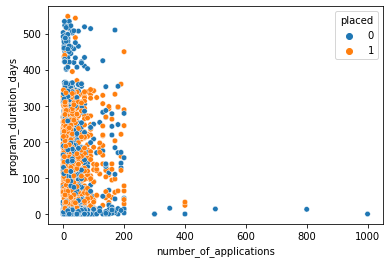

In [122]:
sns.scatterplot(data=df, y="program_duration_days", x="number_of_applications", hue="placed", s= 30, color=".2")

placed means 1(orange), non-placed means 0(blue). Based on the above plot, fellows who turned in the most applications are less likely going to be placed and they pretty much spend more time in the program. This is very interesting as I would think that the more application turned in, the more they stand a chance of being placed. I am also not naive about problems like this. I would like to dig further to figure out other factors that could be creating a suitation like this. As for now, I think fellows with most applications might not have been submitting a good quality resume and cover letter. I wish Pathrise would create a new column where they will rate fellows resumes for every application they submitted.

<AxesSubplot:xlabel='number_of_applications', ylabel='number_of_interviews'>

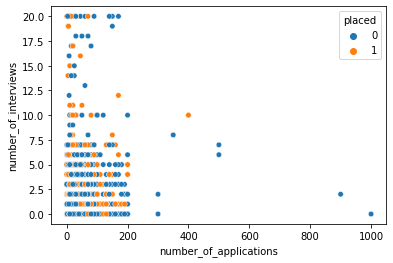

In [123]:
 sns.scatterplot(data=df, y="number_of_interviews", x="number_of_applications", hue="placed", s= 30, color=".2")

As expected, fellows who were placed received more interviews than those who turned in more applications.

<AxesSubplot:xlabel='number_of_applications', ylabel='length_of_job_search'>

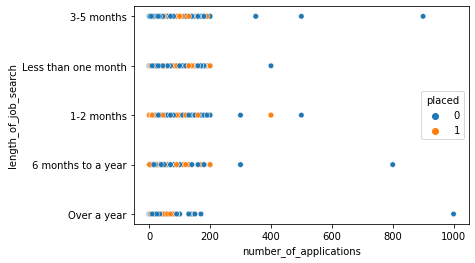

In [124]:
 sns.scatterplot(data=df, y="length_of_job_search", x="number_of_applications", hue="placed", s= 30, color=".2")

From the aboved, you can see that max number of applications that a placed fellow turned in before being placed is around 400 compare to 1000 by a non-placed fellow. Most placement happens within 1-2 months, followed by less than 1 month period. I wonder if their Work Authorization, experience level or level of education has anything to do it. let's find out.

<AxesSubplot:xlabel='number_of_applications', ylabel='work_authorization_status'>

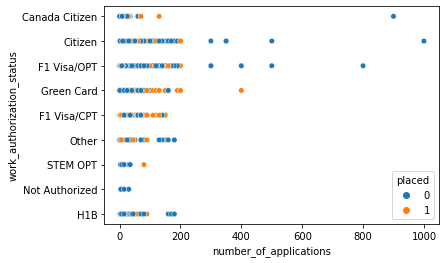

In [125]:
sns.scatterplot(data=df, y="work_authorization_status", x="number_of_applications", hue="placed", s= 30, color=".2")

It seems like fellows with green card are more likely going to be placed than any other fellows. F1 Visa/CPT fellows are also more likely going to be placed. There might be something else going on here as I would assume that citizens would be placed more easily compare to other fellows with work authorization. Also citizens seemed to be the fellows turning more applications which I have raised concerned about potential poor resume or cover letter. Next I will like to examine their level of eduction and work authorization

<ipython-input-126-bacd57c081fd>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')


[Text(0, 0, 'Canada Citizen'),
 Text(1, 0, 'Citizen'),
 Text(2, 0, 'Citizen'),
 Text(3, 0, 'Citizen'),
 Text(4, 0, 'F1 Visa/OPT'),
 Text(5, 0, 'Green Card'),
 Text(6, 0, 'Green Card'),
 Text(7, 0, 'Citizen'),
 Text(8, 0, 'F1 Visa/CPT')]

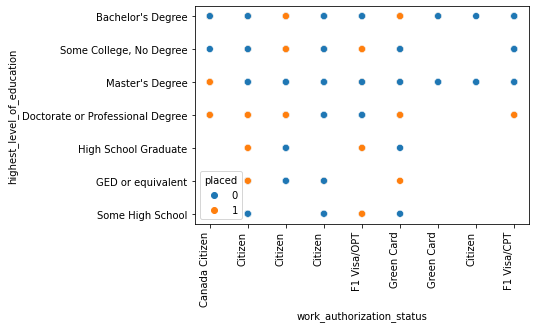

In [126]:
b=sns.scatterplot(data=df, x="work_authorization_status", y="highest_level_of_education", hue="placed", s= 50, color=".2")
b.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')

Fellows with Master's Degree were less likely to be placed compare to Bachelor's degree. A good amount of citizens do not have doctorate degree or masters. Other fellows with different kinda of work authorization seems to have pretty much all sorts of degrees, hence diminishing the rating of citizens when placement is considered.

<ipython-input-127-283c0e7a2bc6>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(df["highest_level_of_education"],rotation=90, ha='right')


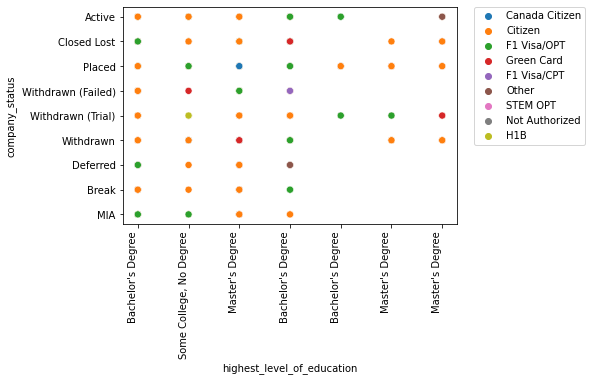

In [127]:
c=sns.scatterplot(data=df, x="highest_level_of_education", y='company_status', hue= 'work_authorization_status', s= 50, color=".2")
c.set_xticklabels(df["highest_level_of_education"],rotation=90, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fellows that are citizens are more likely to take a break,deferred, withdraw or be classified as closed lost by Pathrise.

<ipython-input-128-e662d2783d93>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')


[Text(0, 0, 'Canada Citizen'),
 Text(1, 0, 'Citizen'),
 Text(2, 0, 'Citizen'),
 Text(3, 0, 'Citizen'),
 Text(4, 0, 'F1 Visa/OPT'),
 Text(5, 0, 'Green Card'),
 Text(6, 0, 'Green Card'),
 Text(7, 0, 'Citizen'),
 Text(8, 0, 'F1 Visa/CPT')]

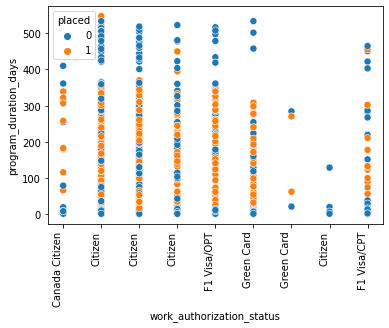

In [128]:
d=sns.scatterplot(data=df, x="work_authorization_status", y= 'program_duration_days', hue= 'placed', s= 50, color=".2")
d.set_xticklabels(df["work_authorization_status"],rotation=90, ha='right')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

some fellows spent less than 100 days. most of the placement happens within 0-200 days. 

/Applications/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


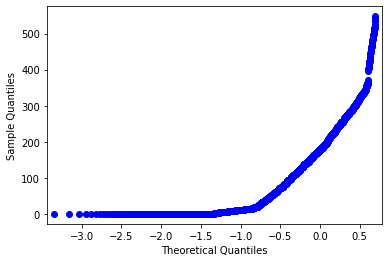

In [129]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(df['program_duration_days'])
pylab.show()

program_duration_days is not normally distributed.

# Training and Test Datasets

In [142]:

x = df.drop(columns='placed')
y = df.placed
# The test_size--> train with 7% of the data, and test on 30%. 
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=47)

In [143]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1745, 13) (1745,)
(749, 13) (749,)


checking how good the mean is as a predictor

In [144]:
X_test.dtypes

company_status                  object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
race                            object
dtype: object

In [145]:
X_train.dtypes

company_status                  object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
race                            object
dtype: object

In [146]:
names_list = ['company_status', 'primary_track', 'cohort_tag', 'employment_status ', 'highest_level_of_education', 'length_of_job_search',
             'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'race']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

/Applications/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((1745, 3), (749, 3))

In [147]:
train_mean = y_train.mean()
train_mean

0.3638968481375358

In [148]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train ,y_train)
dumb_reg.constant_

array([[0.36389685]])

# Metrics

# 1. R-squared, or coefficient of determination

A model that perfectly predicts the observed values would have no residual error and so give $R^2=1$. Models that do worse than predicting the mean will have increased the sum of squares of residuals and so produce a negative $R^2$

In [149]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 -  sum_sq_res/sum_sq_tot
    return R2

Making predictions by creating an array of length the size of the training set with the single value of the mean

In [150]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([0.36389685, 0.36389685, 0.36389685, 0.36389685, 0.36389685])

In [151]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.36389685, 0.36389685, 0.36389685, 0.36389685, 0.36389685])

In [152]:
r_squared(y_train, y_tr_pred)

0.0

In [153]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.004815977531617666

# 2. Mean Absolute Error

In [154]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [155]:
mae(y_train, y_tr_pred)

0.46295186410620603

In [156]:
mae(y_test, y_te_pred)

0.472197887536773

This means I might expect to be off by around \0.47 if I guessed placement based on an average of known values

# 3. Mean Squared Error

In [157]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [158]:
mse(y_train, y_tr_pred)

0.23147593205310307

In [159]:
mse(y_test, y_te_pred)

0.24072195548367004

converting this back to our measurement space by taking the square root to form the root mean square error

In [160]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([0.48111946, 0.49063424])

# Sklearn metrics

1. R-squared

In [161]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.004815977531617666)

 2. Mean absolute error

In [162]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.46295186410620603, 0.472197887536773)

# Initial Models

# Impute missing values with median

any missing value will be replaced with these below

In [163]:
X_defaults_median = X_train.median()
X_defaults_median

program_duration_days     107.5
number_of_interviews        1.0
number_of_applications     20.0
dtype: float64

Apply the imputation to both train and test splits

In [164]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

Scale the data

In [165]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# Train the model on the train split

Making predictions using the model on both train and test splits

In [166]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [167]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

Assessing model performance

In [168]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.055018218867670665, 0.035433179175561325)

The simple linear regression model explains 5% of the variance on the train set and 3% on the test set. 

In [169]:
#calculating the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(0.43748107712161477, 0.4509441448597206)

Using this model, then, on average I expect to estimate a placement within \0.43 or so of the real placement. This is much, much better than the \\0.05 from just guessing using the average

In [170]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(0.21874053856080738, 0.2310795374431827)

# Impute missing values with the mean

In [171]:
#any missing value will be replaced with the mean
X_defaults_mean = X_train.mean()
X_defaults_mean

program_duration_days     134.650152
number_of_interviews        2.169375
number_of_applications     36.953582
dtype: float64

In [172]:
#Applying the imputation to both train and test splits
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [173]:
#Scale the data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [174]:
#Train the model on the train split

lm = LinearRegression().fit(X_tr_scaled, y_train)

In [175]:
#Making predictions using the model on both train and test splits

y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [176]:
#Assess model performance

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.036002577242284395, 0.019180981119693463)

In [177]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.44628440385926293, 0.4589662938212105)

In [178]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.22314220192963147, 0.2349730472841857)

The results aren't different from the imputation with median

# Pipelines

1. Define the pipeline

In [179]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [180]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

2. Fit the pipeline

In [181]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

3. Make predictions on the train and test sets

In [182]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

4. Assess performance

In [183]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.055018218867670665, 0.035433179175561325)

comparing with my non-pipeline result

In [184]:
median_r2

(0.055018218867670665, 0.035433179175561325)

In [185]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.43748107712161477, 0.4509441448597206)

In [186]:
median_mae

(0.43748107712161477, 0.4509441448597206)

In [187]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.21874053856080738, 0.2310795374431827)

In [188]:
median_mse

(0.21874053856080738, 0.2310795374431827)

# Random Forest Model

1 Define the pipeline

In [189]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [190]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [191]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.41347948, 0.55912211, 0.37155833, 0.45417896, 0.37303747])

In [192]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.43427526899986635, 0.0694245456651578)

# Hyperparameter search using GridSearchCV

In [193]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [194]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [195]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [196]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [197]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.43684971, 0.56012625, 0.39970302, 0.47467846, 0.38059605])

In [198]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.45039069902180157, 0.06364852986513654)

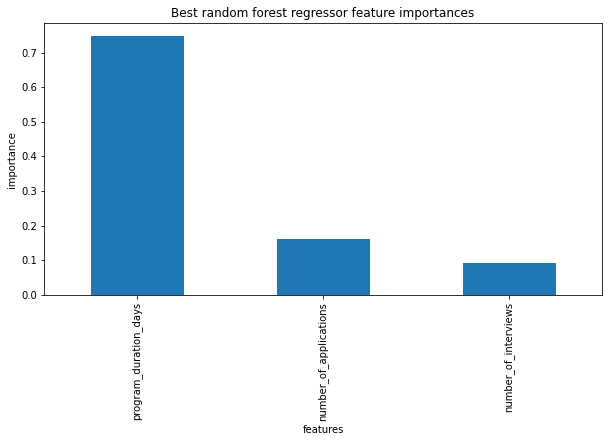

In [199]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant feature"program_duration_days" is common with my model

# Random forest regression model performance

In [200]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [201]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.22319804475371813, 0.014863297335899955)

In [202]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.2422565611291246

# Data quantity assessment

In [ ]:
# Conclusion

checking to see if Pathrise should collect more data or not

In [203]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

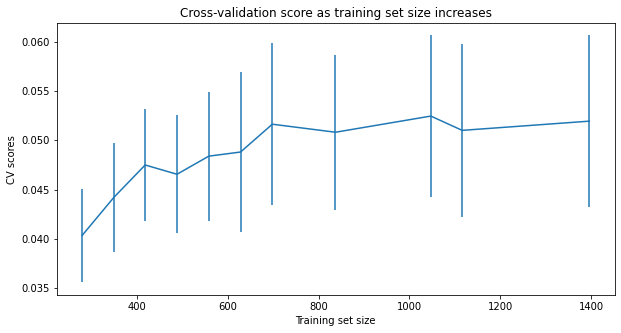

In [204]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

There are rapid improvements in model scores around 405 before other major rise and falls at 700 and possibly 1020. It seems to start levelling up after 1700. Hence Collecting more data may not cause significant change. 

# Save best model object from pipeline

In [242]:
import datetime
best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [247]:
# save the model

modelpath = '../model'
filename = 'Data_Pathrise.pkl'
pickle.dump(best_model, open(filename, 'wb'))